In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(21881, 28)
(21881, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL swings
idxs = np.where(X_relative_footsteps_acc[:, 23] == 1)[0]
X_relative_footsteps_acc_RL_swing = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_RL_swing = Y_relative_footsteps_acc[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_acc_RL_swing[0, :]

array([ 0.        ,  0.        ,  0.        , -0.01667854,  0.02806931,
        0.04898649, -0.00293043,  0.04369139, -0.00966195,  0.22882891,
        0.16832004, -0.40987395,  0.23396882, -0.16832977, -0.40997042,
       -0.24291083,  0.16426133, -0.41338172, -0.24842681, -0.16367363,
       -0.41372354,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

In [9]:
X_relative_footsteps_acc_RL_swing[0, :]

array([ 0.        ,  0.        ,  0.        , -0.01667854,  0.02806931,
        0.04898649, -0.00293043,  0.04369139, -0.00966195,  0.22882891,
        0.16832004, -0.40987395,  0.23396882, -0.16832977, -0.40997042,
       -0.24291083,  0.16426133, -0.41338172, -0.24842681, -0.16367363,
       -0.41372354,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

### Linear Regression

In [44]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_swing[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.7902792186867946
RMSE:  0.011435335347029674
The lowest error is:  7.10730484632105e-07
The highest error is:  0.08141665342826834
The avg. error is:  0.0058409918557041605


In [45]:
model_rl_relative_swinging_x.coef_

array([[-0.02192488, -0.01108213,  0.02291717,  0.10723446,  0.00037244,
         0.01561971,  0.15274073,  0.17767487, -0.00477221,  0.11477326,
         0.30707139, -0.04984643,  0.10415217, -0.11340734]])

In [46]:
model_rl_relative_swinging_x.intercept_

array([-0.20365848])

Text(0, 0.5, 'Predictions')

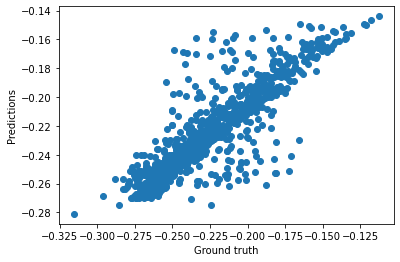

In [47]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [48]:
#%store model_rl_relative_swinging_x

In [49]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [50]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [57]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_swing[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.920916685972077
RMSE:  0.007921648135412475
The lowest error is:  8.700548186912904e-07
The highest error is:  0.04873901769465094
The avg. error is:  0.00482397322409094


In [58]:
model_rl_relative_swinging_y.coef_

array([[-0.02504178, -0.01850434,  0.02779902,  0.00108434,  0.10323362,
         0.12011877, -0.12400546,  0.52261692,  0.12969648,  0.03984607,
        -0.08978501,  0.55321892,  0.36904738, -0.12580072]])

In [59]:
model_rl_relative_swinging_y.intercept_

array([0.04183551])

Text(0, 0.5, 'Predictions')

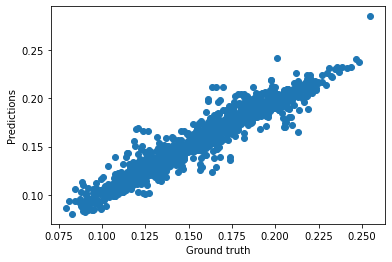

In [60]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [73]:
#%store model_rl_relative_swinging_y

In [74]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [75]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")